In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy
import re

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [162]:
df = pd.read_csv("measured_wasp_17b_params.csv")#, header=None)
df = df.set_index('Parameter')

In [163]:
df

,A,B,C,D
Parameter,,,,
T_0,1630.8616428840369+0.00039904889376884967-0.00...,1630.8614018713324+0.00023805651130714978-0.00...,1630.861610663565+0.00029717062670897576-0.000...,1630.8614881350509+0.00026684631575335516-0.00...
RpRs,0.1203829698708299+0.00046385548844797564-0.00...,0.12130714805888419+0.000404658423926868-0.000...,0.12132331355382717+0.0009057218589828414-0.00...,0.12217592094892667+0.0005177504782353098-0.00...
P,3.7353984634338695+0.00012925396875784756-0.00...,3.735484831616331+0.0000006232-0.0000016617,3.735457546163345+0.00005353-0.00006277,3.735484553218816+0.0000018351-0.0000018212
i,88.39568159446347+0.8557190483726771-0.9860796...,87.54069213161702+0.43098898185745327-0.514004...,88.05242038422188+0.8237098425502438-1.0511485...,87.30852050543098+0.39644874320137546-0.446981...
a/R*,7.39832492366634+0.20282872618265113-0.1335052...,7.190146553234434+0.12385182418808682-0.128598...,7.309401355606358+0.21775645687941125-0.181765...,7.115132869990389+0.12153948281163807-0.123589...
sigma,---,---,0.0008084652860793481+0.00007816-0.00010340527...,0.0005494388244872845+0.00003614-0.00004188
rho,---,---,0.19044211595490584+0.027793919426255725-0.034...,0.19517484193733126+0.023188086236041294-0.028...
transits,5,12,5,12
colour,"(0.650746, 0.125309, 0.595617, 1.0)","(0.798216, 0.280197, 0.469538, 1.0)","(0.907365, 0.434524, 0.35297, 1.0)","(0.979233, 0.607532, 0.238013, 1.0)"


In [164]:
df_ref_list = df.columns

# df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
# df_R_list = df.loc['R'] #Planetary radius row
# df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']
df_sigma_list = df.loc['sigma']
df_rho_list = df.loc['rho']
df_T_0 = df.loc['T_0']

# e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
# R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
# a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)
sigma_list, sigma_ref_list = read_df_params(df_sigma_list, df_ref_list)
rho_list, rho_ref_list = read_df_params(df_rho_list, df_ref_list)
T_0_list, T_0_ref_list = read_df_params(df_T_0, df_ref_list)

In [165]:
# Model A, Model B, Model C
# TESS: Sector 12 (batman),	TESS: Sector 12 + Sector 38 (batman),	TESS: Sector 12 + Sector 38 (batman + gp)

In [166]:
# y_list = range(0, len(P_ref_list))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,10))

# """
# Period
# """


# mu, upper, lower = P_list[0]
# sigma = max(abs(upper), abs(lower))
# colour = df[P_ref_list[0]]['colour']
# ax1.errorbar(0, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# # plt.xlim(-0.005, 0.005)

# ax1.set_ylabel(r"Period's constraint")

# ax1.set_xticklabels([])
# ax1.tick_params(axis="x", which="both", direction="in")

# # Mirror y
# ax1y = ax1.twinx()
# ax1y.set_ylim(ax1.get_ylim())
# ax1y.get_yaxis().set_ticklabels([])
# ax1y.tick_params(which="both", direction="in")

# # Mirror x
# ax1x = ax1.twiny()
# ax1x.set_xlim(ax1.get_xlim())
# ax1x.get_xaxis().set_ticklabels([])
# ax1x.tick_params(which="both", direction="in")

# ax1x.set_xlabel("Planet")


# """
# RpRs
# """

# for obj, author, y in zip(P_list[1:], P_ref_list[1:], y_list[1:]):
#     mu, upper, lower = obj
#     sigma = max(abs(upper), abs(lower))
#     colour = df[author]['colour']
#     ax2.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# # plt.xlim(-0.005, 0.005)

# # ax2.set_ylabel(r"$R_{p}/R_{*}$ constraint")

# # ax2.set_xticklabels([])

# # Mirror y
# ax2y = ax2.twinx()
# ax2y.set_ylim(ax2.get_ylim())
# ax2y.get_yaxis().set_ticklabels([])
# ax2y.tick_params(which="both", direction="in")

# # Mirror x
# ax2x = ax2.twiny()
# ax2x.set_xlim(ax2.get_xlim())
# ax2x.get_xaxis().set_ticklabels([])
# ax2x.tick_params(which="both", direction="in")



# #
# ax1.set_xticks(y_list)
# ax1x.set_xticks(y_list)
# ax2.set_xticks(y_list)
# ax2x.set_xticks(y_list)
# ax1x.set_xticklabels(df_ref_list)


# # ax.legend()
# # fig.tight_layout()
# plt.subplots_adjust(hspace=0.0)
# plt.show()


In [167]:
# left = 0.1
# bottom = 0.1
# width = 0.65
# height = 0.9
# spacing = -1.125

# rect1 = [left, bottom, width*0.333, height]
# rect2 = [left+(width*0.333)+0.3, bottom, width, height]


# fig = plt.figure(figsize=(2, 2))
# ax1 = fig.add_axes(rect1)
# ax2 = fig.add_axes(rect2)

# """
# ax1
# """
# mu, upper, lower = P_list[0]
# sigma = max(abs(upper), abs(lower))
# colour = df[P_ref_list[0]]['colour']
# ax1.errorbar(0, mu, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# ax1.set_xlim(-0.5, 0.5)

# ax1.set_ylabel("Period (days)")

# ax1.set_xticklabels([])
# # ax1.tick_params(axis="x", which="both", direction="in")

# # Mirror y
# ax1y = ax1.twinx()
# ax1y.set_ylim(ax1.get_ylim())
# ax1y.get_yaxis().set_ticklabels([])
# ax1y.tick_params(which="both", direction="in")

# # Mirror x
# ax1x = ax1.twiny()
# ax1x.set_xlim(ax1.get_xlim())
# ax1x.get_xaxis().set_ticklabels([])
# ax1x.tick_params(which="both", direction="in")




# """
# ax2
# """

# for obj, author, y in zip(P_list[1:], P_ref_list[1:], y_list[1:]):
#     mu, upper, lower = obj
#     sigma = max(abs(upper), abs(lower))
#     colour = df[author]['colour']
#     ax2.errorbar(y, mu, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

# ax2.set_xlim(0.5, 2.5)
# ax2.set_xticklabels([])
# # ax2.tick_params(axis="x", which="both", direction="in")

# # Mirror y
# ax2y = ax2.twinx()
# ax2y.set_ylim(ax2.get_ylim())
# ax2y.get_yaxis().set_ticklabels([])
# ax2y.tick_params(which="both", direction="in")

# # Mirror x
# ax2x = ax2.twiny()
# ax2x.set_xlim(ax2.get_xlim())
# ax2x.get_xaxis().set_ticklabels([])
# ax2x.tick_params(which="both", direction="in")


# ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
# #
# ax1.set_xticks([0])
# ax1x.set_xticks([0])
# ax1.set_xticklabels(["Model A"])
# ax2.set_xticks([1, 2])
# ax2x.set_xticks([1, 2])
# ax2.set_xticklabels(["Model B", "Model C"])

# plt.show()

In [168]:
# left = 0.1
# bottom = 0.1
# width = 0.65
# height = 0.9
# spacing = -1.125

# rect1 = [left, bottom, width, height]


# fig = plt.figure(figsize=(3, 2))
# ax1 = fig.add_axes(rect1)


# """
# ax1
# """
# for obj, author, y in zip(RpRs_list[1:], RpRs_ref_list[1:], y_list[1:]):
#     mu, upper, lower = obj
#     sigma = max(abs(upper), abs(lower))
#     colour = df[author]['colour']
#     ax1.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

# ax1.set_xlim(0.5, 2.5)
# ax1.set_ylabel(r"$R_{p}/R_{*}$ constraint")

# ax1.set_xticklabels([])
# # ax1.tick_params(axis="x", which="both", direction="in")

# # Mirror y
# ax1y = ax1.twinx()
# ax1y.set_ylim(ax1.get_ylim())
# ax1y.get_yaxis().set_ticklabels([])
# ax1y.tick_params(which="both", direction="in")

# # Mirror x
# ax1x = ax1.twiny()
# ax1x.set_xlim(ax1.get_xlim())
# ax1x.get_xaxis().set_ticklabels([])
# ax1x.tick_params(which="both", direction="in")

# ax1.set_xticks(y_list[1:])
# ax1x.set_xticks(y_list[1:])
# ax1.set_xticklabels(["Model B", "Model C"])

# plt.show()

0 (0.254627, 0.013882, 0.615419, 1.0)
1 (0.46555, 0.004545, 0.660139, 1.0)
2 (0.650746, 0.125309, 0.595617, 1.0)
3 (0.798216, 0.280197, 0.469538, 1.0)
4 (0.907365, 0.434524, 0.35297, 1.0)
5 (0.979233, 0.607532, 0.238013, 1.0)
6 (0.988648, 0.809579, 0.145357, 1.0)


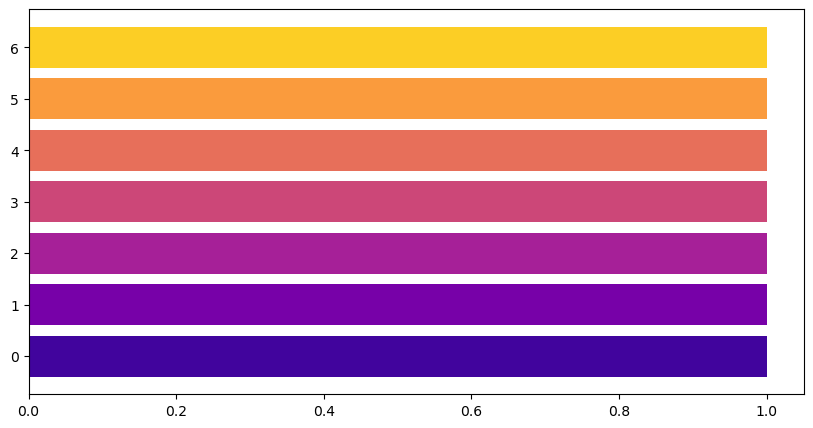

In [169]:
fig, ax = plt.subplots(1, figsize=(10, 5)) 
cmap = plt.get_cmap('plasma')
counter = np.linspace(0.1,0.9, 7) #linspace(bottom of range, top of range, number of bins)
y_list = range(len(counter))
for count, y in zip(counter, y_list):
    ax.barh(y, 1, color=cmap(count), align='center')
    print(y, cmap(count))

plt.show()

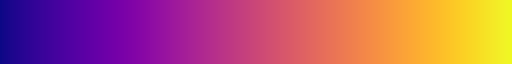

In [170]:
cmap

0 (0.282623, 0.140926, 0.457517, 1.0)
1 (0.248629, 0.278775, 0.534556, 1.0)
2 (0.192357, 0.403199, 0.555836, 1.0)
3 (0.147607, 0.511733, 0.557049, 1.0)
4 (0.119699, 0.61849, 0.536347, 1.0)
5 (0.214, 0.722114, 0.469588, 1.0)
6 (0.449368, 0.813768, 0.335384, 1.0)
7 (0.741388, 0.873449, 0.149561, 1.0)


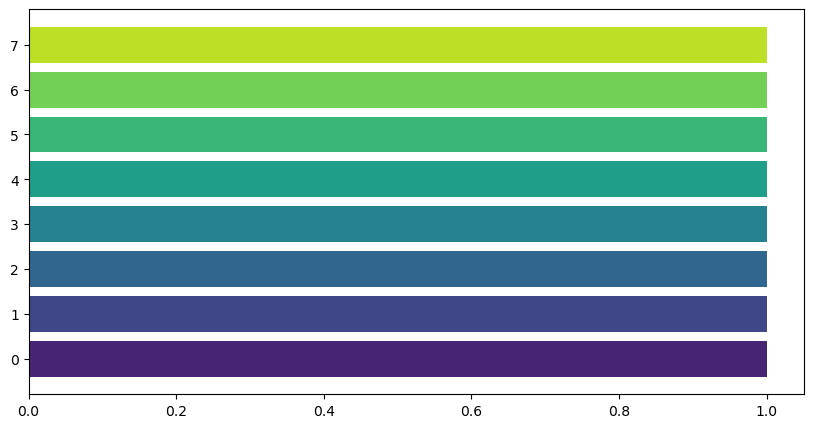

In [171]:
fig, ax = plt.subplots(1, figsize=(10, 5)) 
cmap = plt.get_cmap('viridis')
counter = np.linspace(0.1,0.9, 8) #linspace(bottom of range, top of range, number of bins)
y_list = range(len(counter))
for count, y in zip(counter, y_list):
    ax.barh(y, 1, color=cmap(count), align='center')
    print(y, cmap(count))

plt.show()

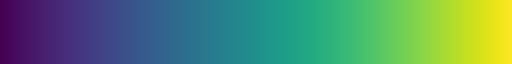

In [172]:
cmap

B 1630.8614018713324 0.00023805651130714978 20.56808257693774
D 1630.8614881350509 0.00026684631575335516 23.055521681089886
C 1630.861610663565 0.00029717062670897576 25.675542147655506
A 1630.8616428840369 0.00039904889376884967 34.47782442162861


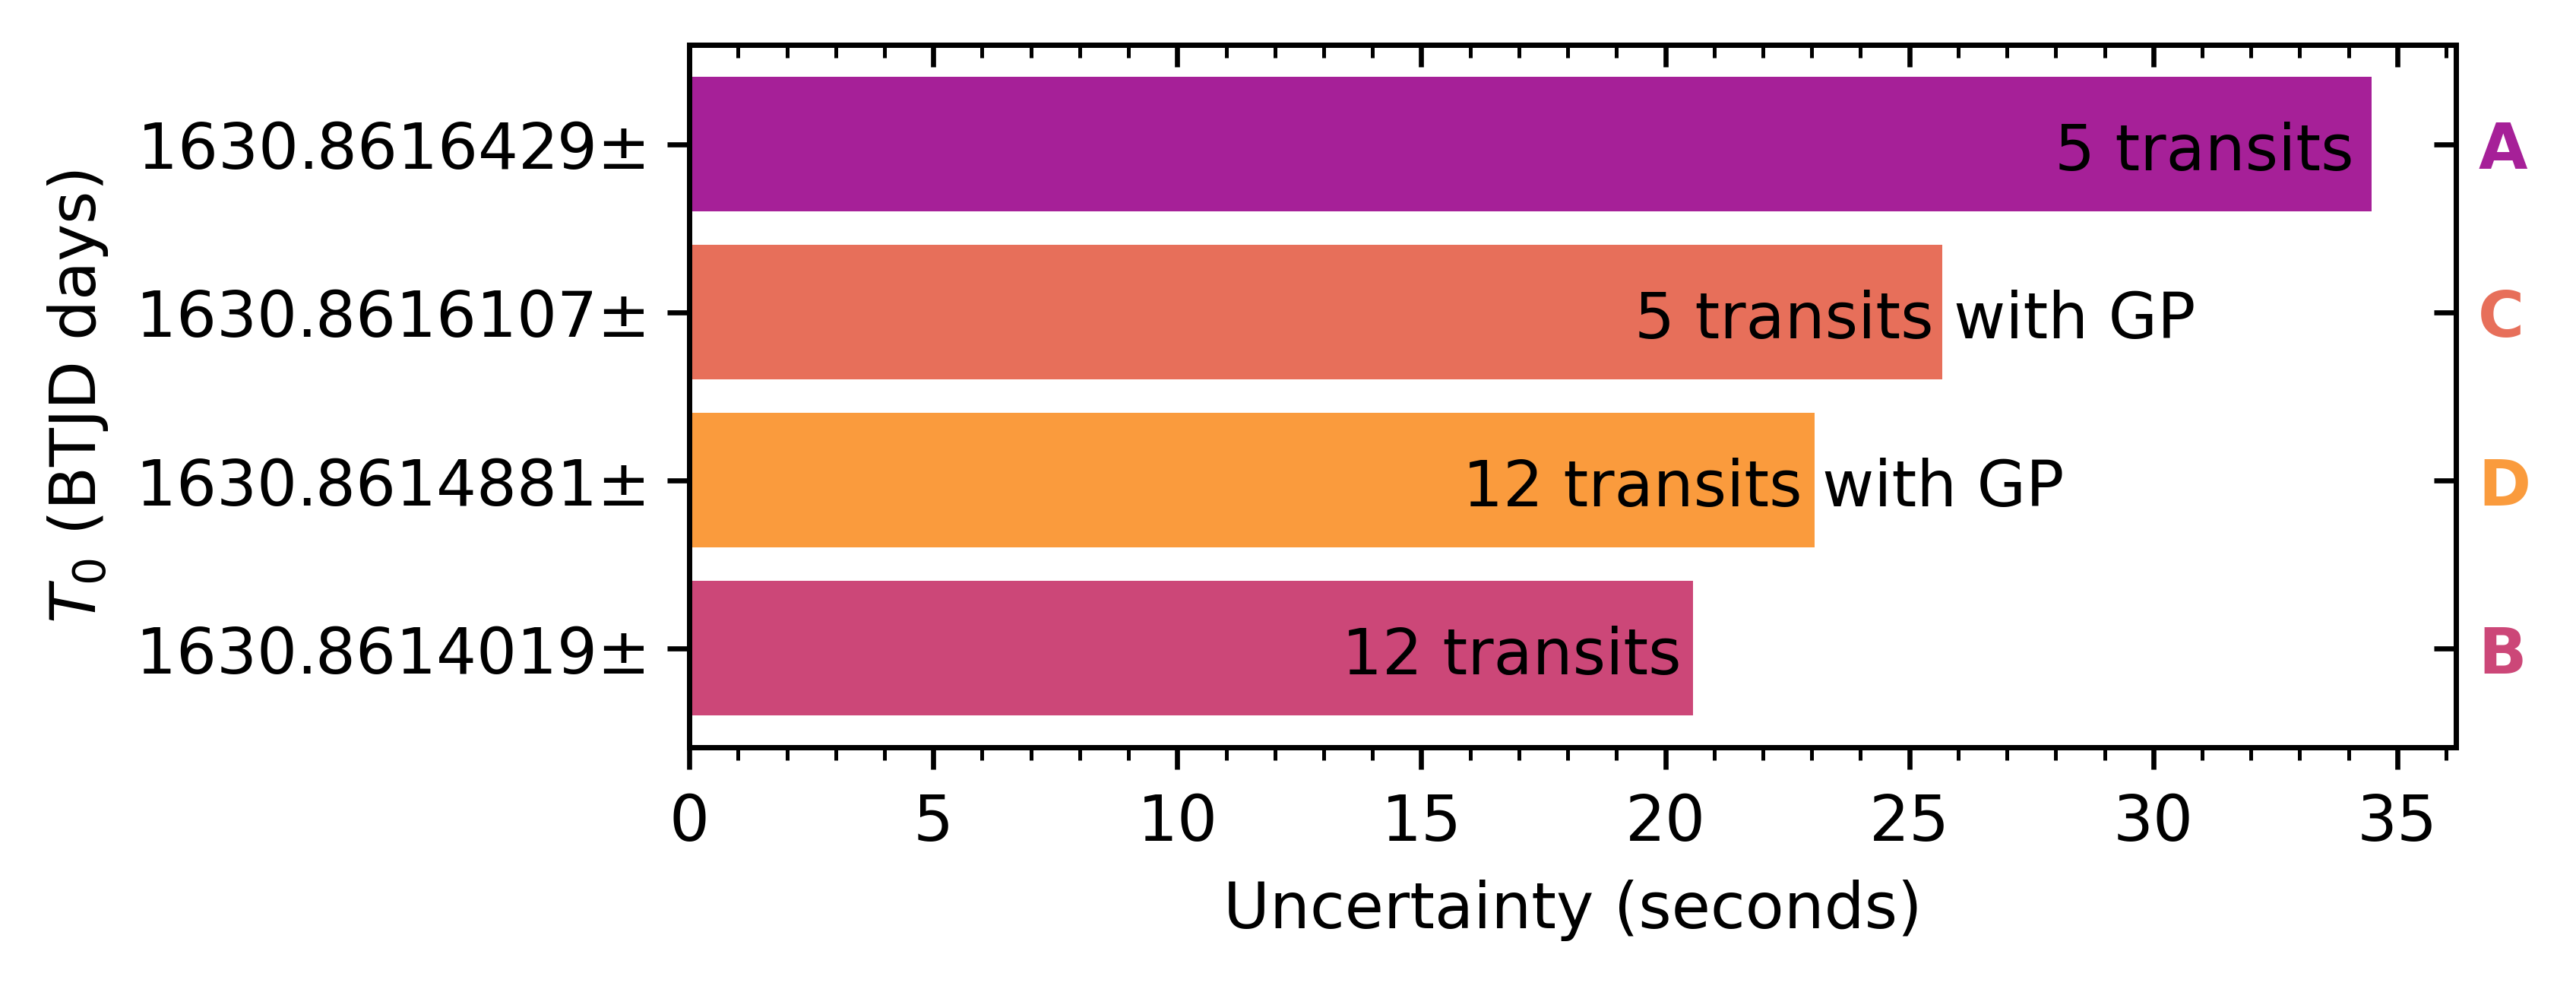

In [173]:
y_list = range(0, len(T_0_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list=[]
T_0_obj = np.concatenate((T_0_list, np.vstack(T_0_ref_list)), axis=1, dtype=object)
T_0_obj = T_0_obj[T_0_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in T_0_obj:
    sigma = max(abs(upper), abs(lower)) * 86400
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)

        
    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "A":
        ax.text(sigma-6.5, (y-0.15), transit_text)

    elif author == "B":
        ax.text(sigma-7.2, (y-0.15), transit_text)

    else:
        transit_text = "%s transits with GP" % transits

        if author == "C":
            ax.text(sigma-6.3, (y-0.15), transit_text)


        elif author == "D":
            ax.text(sigma-7.2, (y-0.15), transit_text)


    y += 1

ax.set_ylabel(r'$T_{0}$ (BTJD days)')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('Uncertainty (seconds)')

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

A 3.7353984634338695 0.00012925396875784756 11.16754290067803
C 3.735457546163345 5.353e-05 4.624992
D 3.735484553218816 1.8351e-06 0.15855264
B 3.735484831616331 6.232e-07 0.05384448


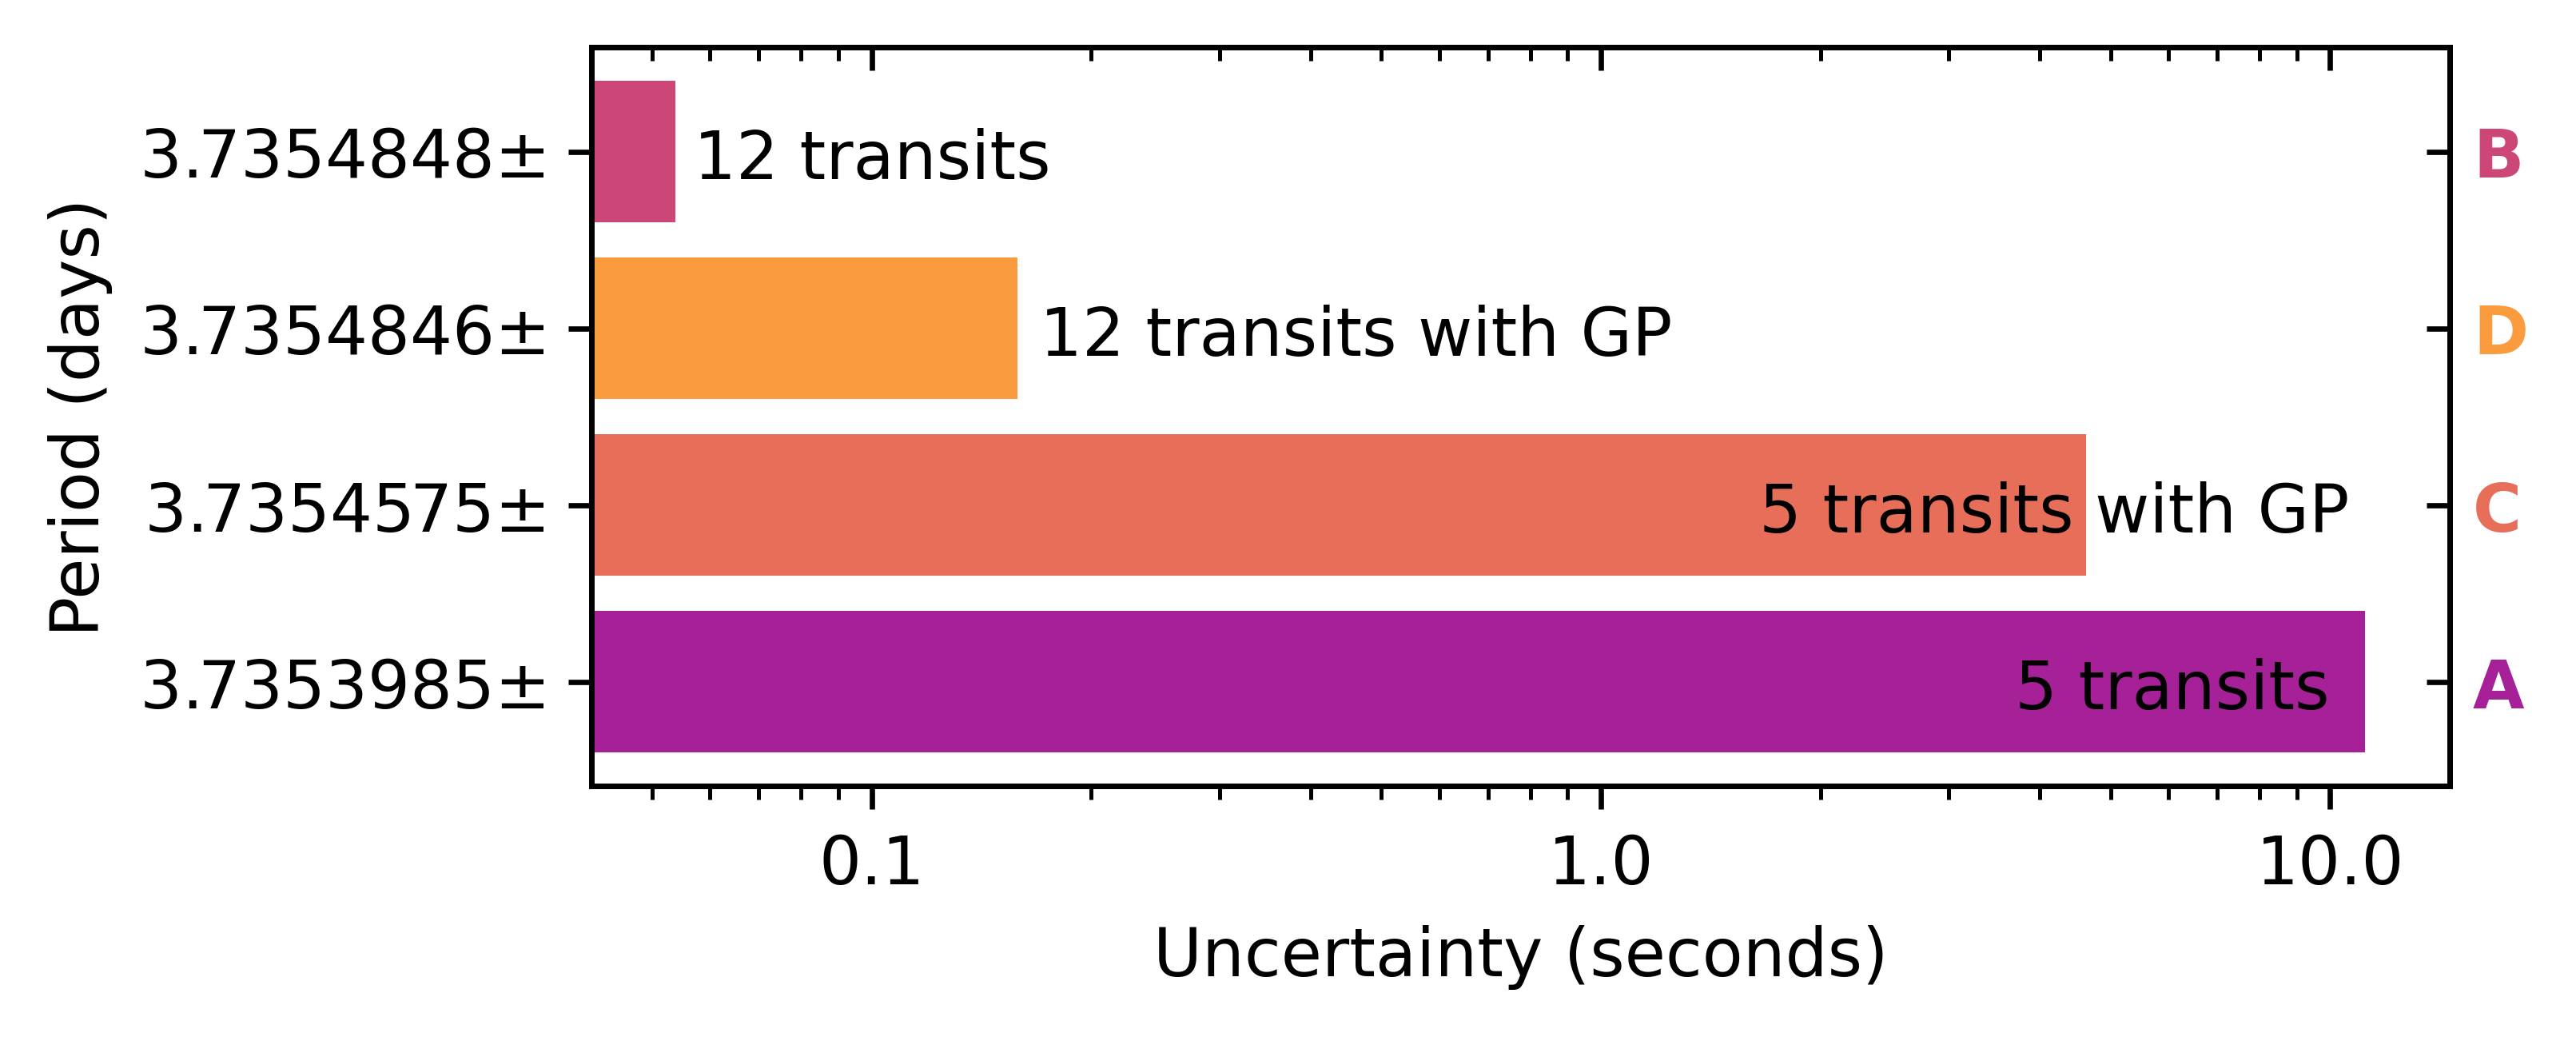

In [174]:
y_list = range(0, len(P_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list=[]
P_obj = np.concatenate((P_list, np.vstack(P_ref_list)), axis=1, dtype=object)
P_obj = P_obj[P_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in P_obj:
    sigma = max(abs(upper), abs(lower)) * 86400
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)

    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "A":
        ax.text(3.7, (y-0.15), transit_text)

    elif author == "B":
        ax.text(0.057, (y-0.15), transit_text)

    else:
        transit_text = "%s transits with GP" % transits
        if author == "C":
            ax.text(1.65, (y-0.15), transit_text)


        elif author == "D":
            transit_text = "%s transits with GP" % transits
            ax.text(0.17, (y-0.15), transit_text)
  

    y+=1

ax.set_xlabel('Uncertainty (seconds)')
ax.set_ylabel("Period (days)")

ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())


# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)


# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.set_xscale('log')
axx.get_xaxis().set_ticklabels([])



plt.show()

A 0.1203829698708299 0.00046385548844797564
B 0.12130714805888419 0.000404658423926868
C 0.12132331355382717 0.0009057218589828414
D 0.12217592094892667 0.0005177504782353098


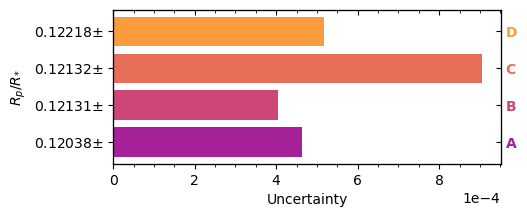

In [175]:
y_list = range(0, len(RpRs_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
author_label = []
colour_list=[]
RpRs_obj = np.concatenate((RpRs_list, np.vstack(RpRs_ref_list)), axis=1, dtype=object)
RpRs_obj = RpRs_obj[RpRs_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in RpRs_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.5f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)
    y += 1

ax.set_ylabel(r'$R_{p}/R_{*}$')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

D 87.30852050543098 0.39644874320137546
B 87.54069213161702 0.43098898185745327
C 88.05242038422188 0.8237098425502438
A 88.39568159446347 0.8557190483726771


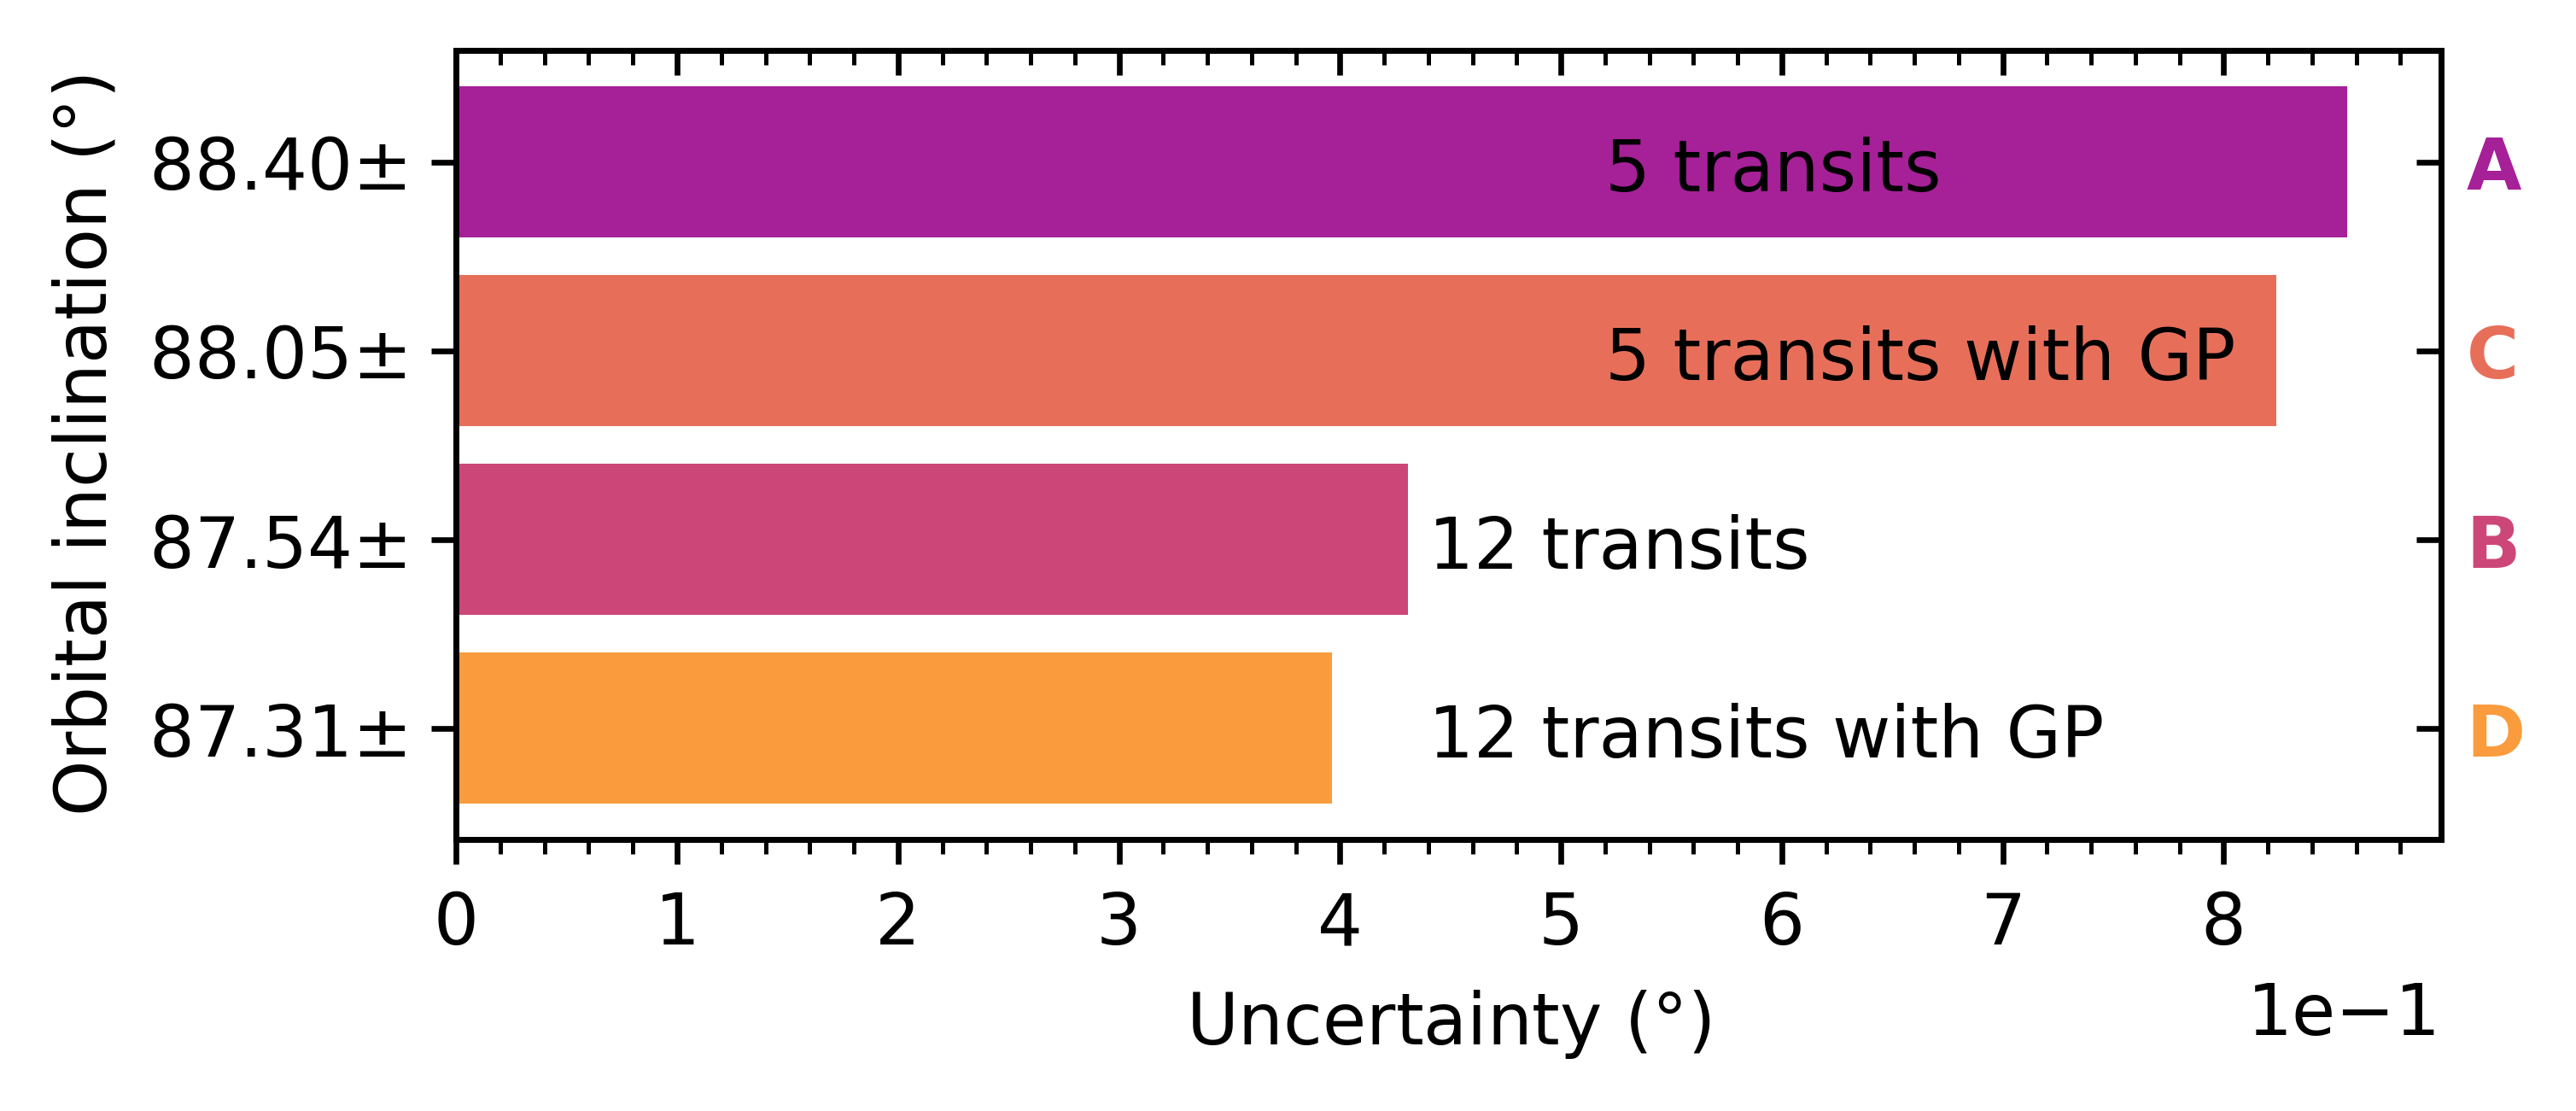

In [176]:
y_list = range(0, len(i_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list = []
i_obj = np.concatenate((i_list, np.vstack(i_ref_list)), axis=1, dtype=object)
i_obj = i_obj[i_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in i_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.2f$\pm$" % (mu)
    labels_with_mu.append(label)
    colour_list.append(colour)
    author_label.append(author)

    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "A":
        ax.text(0.52, (y-0.15), transit_text)

    elif author == "B":
        ax.text(0.44, (y-0.15), transit_text)

    else:
        transit_text = "%s transits with GP" % transits

        if author == "C":
            ax.text(0.52, (y-0.15), transit_text)

        elif author == "D":
            ax.text(0.44, (y-0.15), transit_text)

    y += 1

ax.set_ylabel(r'Orbital inclination ($\degree$)')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty ($\degree$)')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

D 7.115132869990389 0.12153948281163807
B 7.190146553234434 0.12385182418808682
C 7.309401355606358 0.21775645687941125
A 7.39832492366634 0.20282872618265113


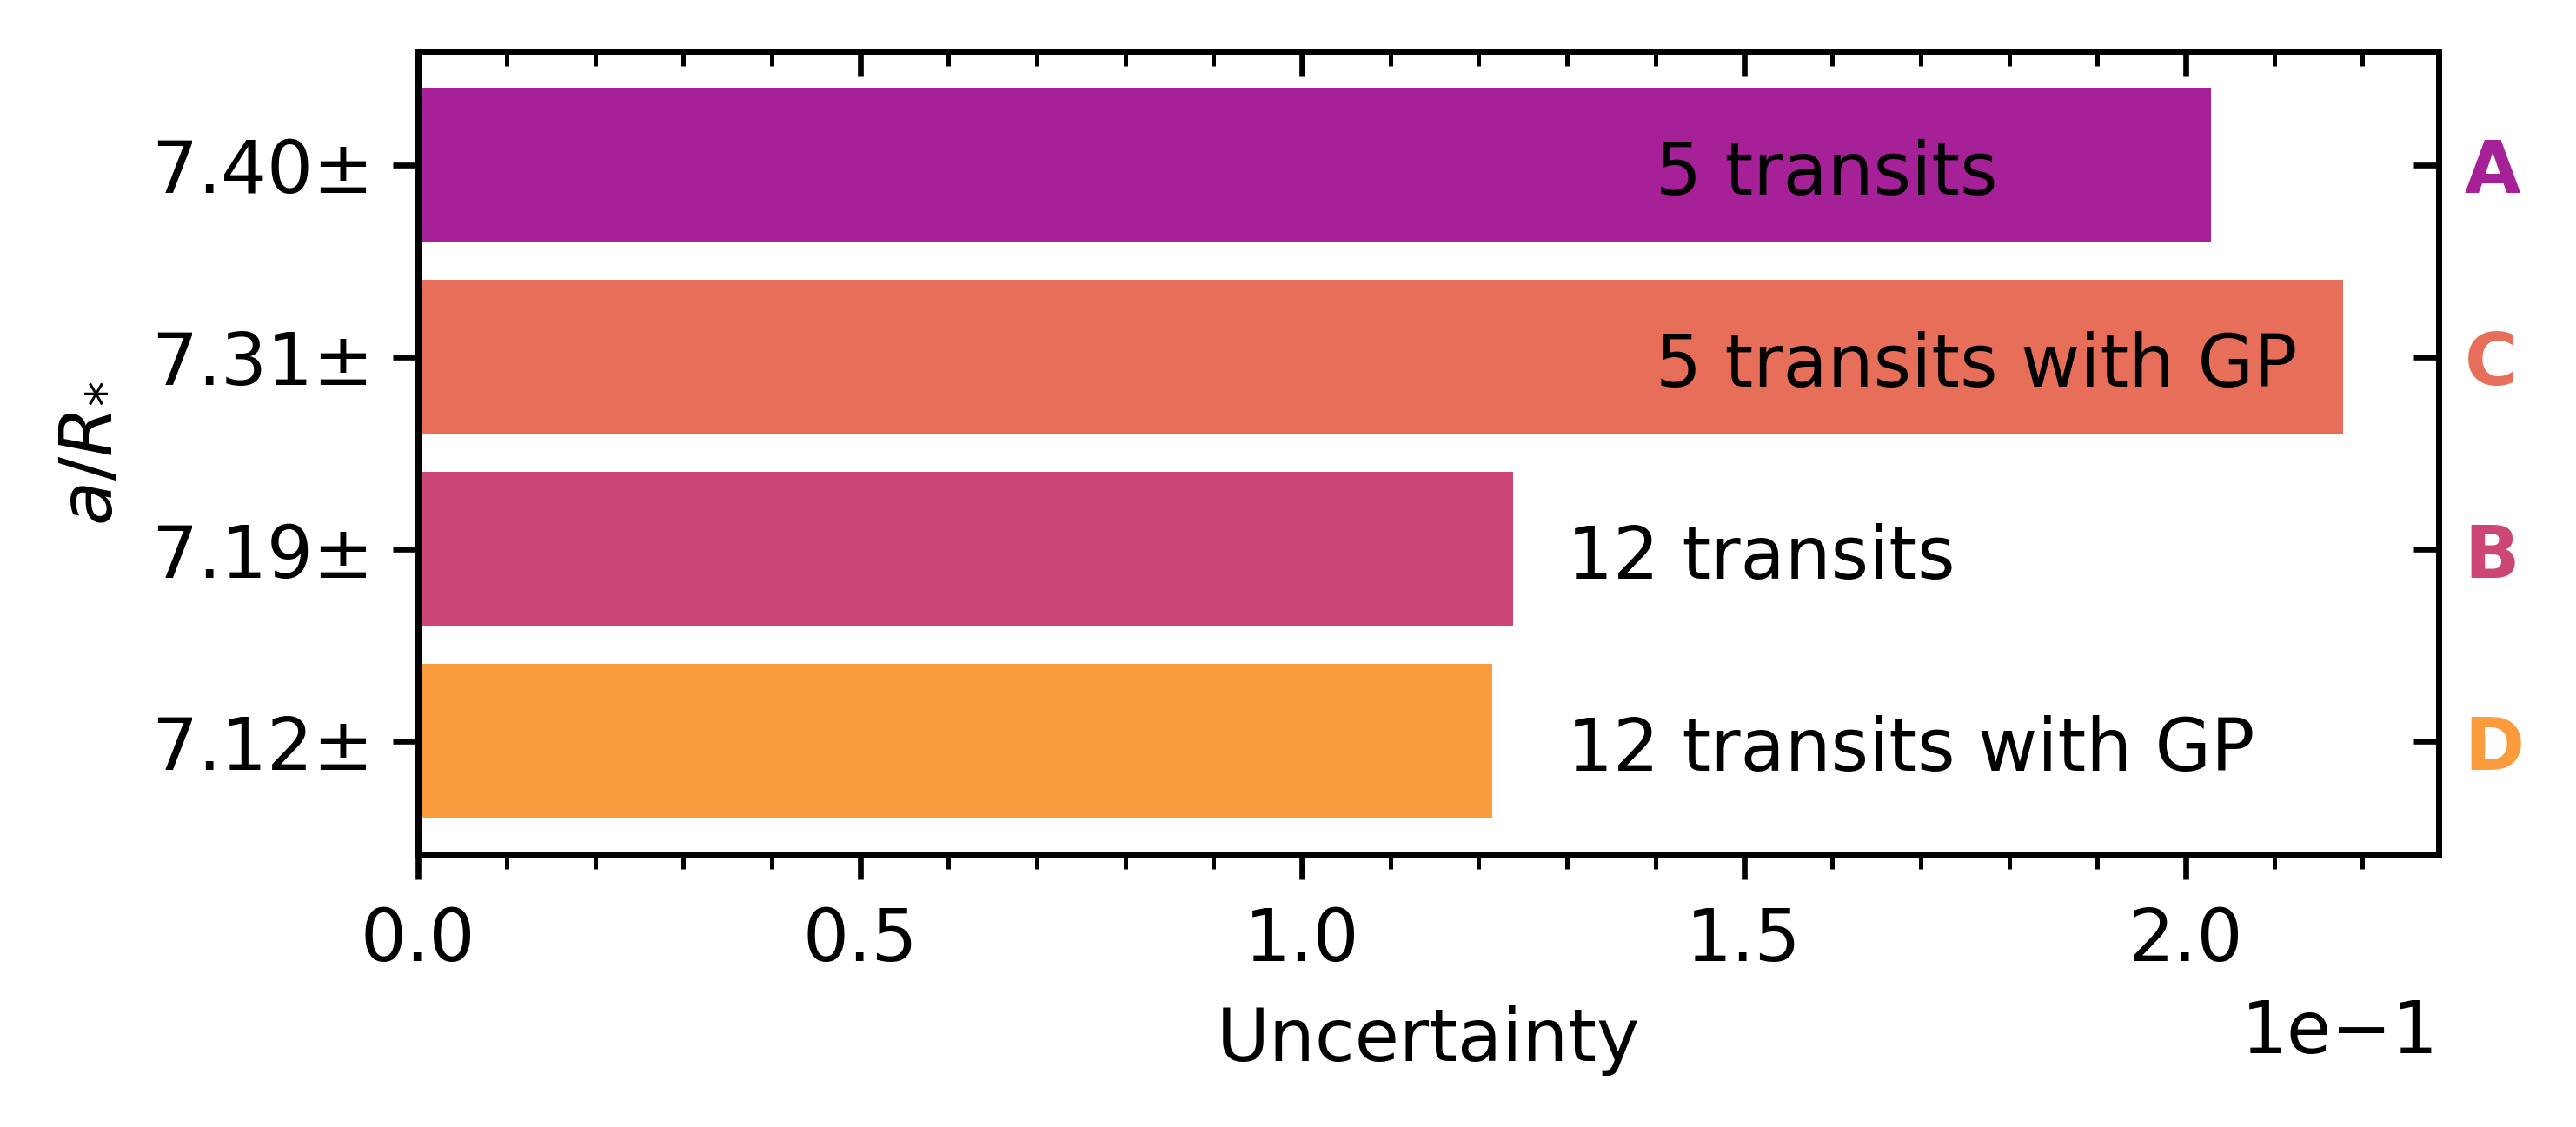

In [177]:
y_list = range(0, len(a_Rs_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list = []
a_Rs_obj = np.concatenate((a_Rs_list, np.vstack(a_Rs_ref_list)), axis=1, dtype=object)
a_Rs_obj = a_Rs_obj[a_Rs_obj[:, 0].argsort()]

y = 0
for mu, upper, lower, author in a_Rs_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, mu, max(abs(upper), abs(lower)))
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.2f$\pm$" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)

    transits = df[author]['transits']
    transit_text = "%s transits" % transits 
    if author == "A":
        ax.text(0.14, (y-0.15), transit_text)

    elif author == "B":
        ax.text(0.13, (y-0.15), transit_text)

    else:
        transit_text = "%s transits with GP" % transits

        if author == "C":
            ax.text(0.14, (y-0.15), transit_text)

        elif author == "D":
            ax.text(0.13, (y-0.15), transit_text)

    y += 1

ax.set_ylabel(r'$a/R_{*}$')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'Uncertainty')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.get_xaxis().set_ticklabels([])

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()